Dataset Shape: (30, 8)
  HouseID  Size_sqft  Bedrooms  Bathrooms  Location  Year_Built  \
0    H001       1200         2          2     Urban        2015   
1    H002       2500         4          3  Suburban        2010   
2    H003       1800         3          2  Suburban        2018   
3    H004       3200         5          4     Urban        2020   
4    H005        900         2          1     Rural        2005   

   Amenities_Score   Price  
0                7  180000  
1                8  420000  
2                6  310000  
3                9  650000  
4                4   95000  
Missing Values After Cleaning: 0


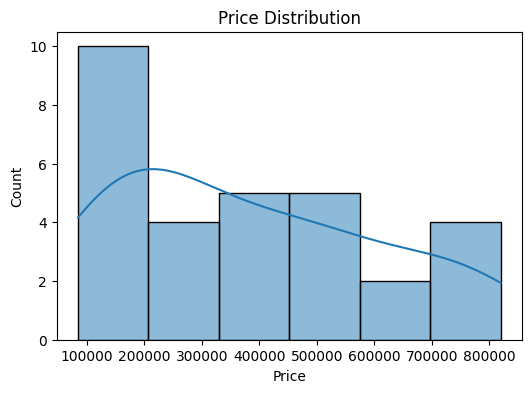

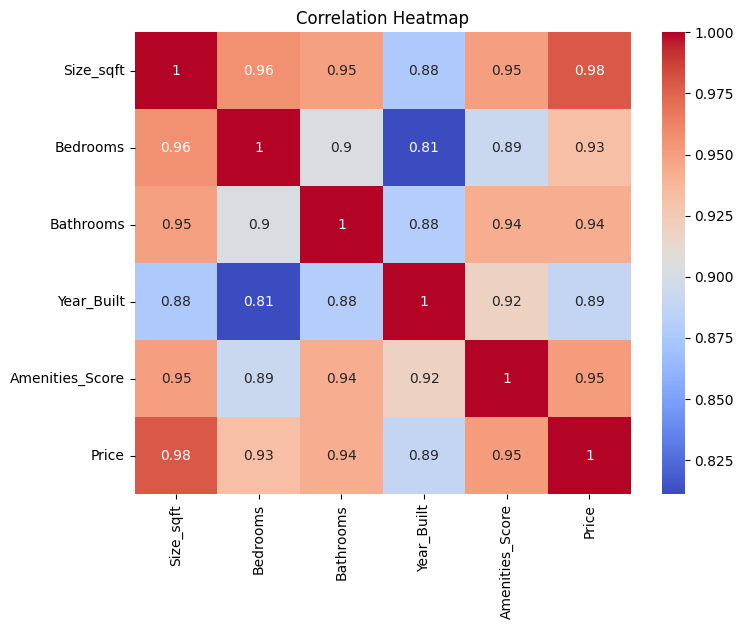


Model Performance Comparison:
                            MAE          RMSE  R2 Score
Linear Regression  46243.123905  53120.403862  0.955228
Ridge Regression   53818.407249  58863.937753  0.945022
Lasso Regression   46243.268802  53120.047335  0.955228
XGBoost            68168.088542  86690.595591  0.880757

Best Ridge Alpha: {'alpha': 1}

Final Ridge Model Performance:
MAE: 53818.407249344375
RMSE: 58863.93775300165
R2 Score: 0.9450224011457476


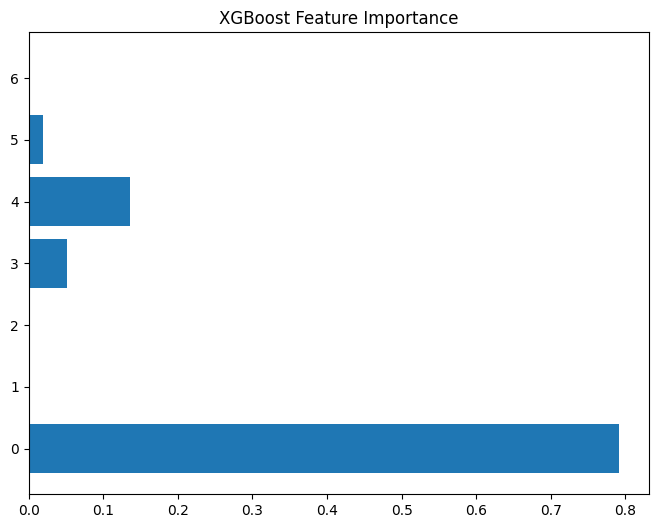


Sample Predictions: [355911.16271617 152242.29924151 710546.21423106 253170.78005105
 191547.21745452]

Project Completed Successfully 


In [7]:
"""
House Price Prediction - End-to-End Regression Project
Author: Mohammed Shamsad
Dataset: house price.csv
"""

# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor


# 2. Load Dataset

df = pd.read_csv("house price.csv")

print("Dataset Shape:", df.shape)
print(df.head())


# 3. Data Cleaning

df.drop("HouseID", axis=1, inplace=True)

df.drop_duplicates(inplace=True)

# Fill missing numeric values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

print("Missing Values After Cleaning:", df.isnull().sum().sum())

# 4. Exploratory Data Analysis (EDA)

plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

# Correlation Heatmap (Numeric Only)

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 5. Feature Engineering

df = pd.get_dummies(df, columns=["Location"], drop_first=True)

X = df.drop("Price", axis=1)
y = df["Price"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 7. Model Training

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "XGBoost": XGBRegressor(objective="reg:squarederror")
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = [mae, rmse, r2]

# Show Results
results_df = pd.DataFrame(results, index=["MAE", "RMSE", "R2 Score"]).T
print("\nModel Performance Comparison:")
print(results_df)


# 8. Hyperparameter Tuning (Ridge Example)

params = {'alpha': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(Ridge(), params, cv=5)
grid.fit(X_train, y_train)

print("\nBest Ridge Alpha:", grid.best_params_)

best_ridge = grid.best_estimator_

y_pred_best = best_ridge.predict(X_test)

print("\nFinal Ridge Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2 Score:", r2_score(y_test, y_pred_best))


# 9. Feature Importance (XGBoost)

xgb_model = models["XGBoost"]

plt.figure(figsize=(8,6))
plt.barh(range(len(xgb_model.feature_importances_)),
         xgb_model.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()


# 10. Sample Predictions

sample_prediction = best_ridge.predict(X_test[:5])
print("\nSample Predictions:", sample_prediction)

print("\nProject Completed Successfully ")
